# K-Means Clustering

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/mlb_players.csv').drop('Unnamed: 0', axis = 1)
df.head()

,MLBID,FIRSTNAME,LASTNAME,ACTIVE,Player,Team,Pos,Age,G,AB,...,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,salary
0,547989,Jose,Abreu,Y,Jose Abreu,CWS,1B,34,152,566,...,61,143,0,10,22,0.261,0.351,0.481,0.832,"$17,666,666"
1,642715,Willy,Adames,Y,Willy Adames,TB,SS,26,41,132,...,10,51,0,0,0,0.197,0.254,0.371,0.625,"$590,000"
2,501303,Ehire,Adrianza,Y,Ehire Adrianza,ATL,SS,32,109,182,...,21,42,1,3,2,0.247,0.327,0.401,0.728,"$1,500,000"
3,542583,Jesus,Aguilar,Y,Jesus Aguilar,MIA,1B,31,131,449,...,46,93,0,7,3,0.261,0.329,0.459,0.788,"$4,500,000"
4,605113,Nick,Ahmed,Y,Nick Ahmed,ARI,SS,31,129,434,...,34,104,2,1,2,0.221,0.280,0.339,0.619,"$8,125,000"


In [3]:
# Convert salary from object to int
df['salary'] = df['salary'].str.replace(',', '').str.replace('$', '').astype(int)

#Copied from https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

<ipython-input-3-3820715aeb76>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['salary'] = df['salary'].str.replace(',', '').str.replace('$', '').astype(int)


In [4]:
df = df.drop(columns = ['MLBID', 'FIRSTNAME', 'LASTNAME', 'ACTIVE', 'Player', 'Team', 'Pos'])

In [5]:
sc = StandardScaler()
X_sc = sc.fit_transform(df)

In [8]:
#dimensionality reduction
pca = PCA(n_components = 5)
pca.fit(X_sc)
X_pca = pca.transform(X_sc)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.7942751102805853


In [9]:
km = KMeans(n_clusters = 5, random_state=42)
km.fit(X_pca)

KMeans(n_clusters=5, random_state=42)

In [10]:
km.cluster_centers_

array([[ 0.12591395,  0.04298062, -0.62594284, -0.22822576,  0.1476588 ],
       [ 4.57319843,  0.55497908, -0.82934869, -0.30132046,  0.03031545],
       [-1.6561472 ,  1.41402118,  1.11953378,  0.02169497,  0.13407506],
       [-3.71580354, -0.59920169, -0.55605713, -0.0387376 , -0.18754383],
       [ 2.43026807, -1.93659163,  1.20863136,  0.7519454 , -0.14272555]])

In [11]:
km.labels_

array([1, 3, 2, 1, 4, 3, 2, 4, 3, 2, 1, 1, 1, 2, 4, 4, 3, 3, 3, 1, 4, 4,
       2, 3, 3, 4, 0, 2, 3, 0, 3, 2, 3, 1, 1, 4, 3, 1, 1, 0, 1, 1, 0, 3,
       0, 0, 0, 3, 0, 2, 2, 0, 1, 2, 3, 2, 3, 1, 1, 0, 1, 3, 3, 1, 0, 2,
       4, 3, 1, 3, 2, 4, 0, 3, 0, 1, 3, 2, 1, 1, 4, 1, 4, 0, 2, 0, 2, 3,
       2, 0, 1, 0, 0, 3, 0, 0, 2, 2, 1, 4, 2, 2, 2, 3, 4, 2, 0, 2, 2, 4,
       4, 0, 2, 1, 2, 2, 3, 1, 3, 3, 4, 4, 1, 4, 2, 4, 2, 2, 2, 3, 1, 3,
       3, 0, 2, 3, 1, 0, 0, 4, 4, 2, 3, 0, 3, 3, 4, 1, 4, 1, 3, 0, 4, 3,
       3, 0, 3, 1, 1, 0, 0, 3, 3, 2, 2, 3, 1, 4, 2, 1, 3, 2, 2, 0, 2, 2,
       3, 1, 0, 0, 4, 0, 3, 4, 4, 2, 2, 3, 3, 0, 2, 4, 3, 2, 4, 3, 0, 3,
       1, 0, 0, 1, 2, 0, 1, 4, 2, 2, 2, 2, 1, 3, 3, 3, 0, 0, 1, 3, 3, 1,
       0, 1, 2, 3, 3, 4, 0, 3, 0, 1, 2, 4, 0, 0, 1, 3, 4, 1, 0, 0, 4, 0,
       0, 2, 4, 3, 4, 2, 0, 0, 3, 1, 1, 4, 3, 3, 3, 2, 4, 3, 3, 3, 1, 0,
       4, 4, 0, 2, 3, 2, 1, 1, 4, 3, 3, 3, 0, 1, 3, 4, 2, 1, 3, 1, 2, 1,
       1, 3, 2, 2, 0, 2, 4, 4, 3, 2, 3, 4, 2, 0, 2,

In [12]:
df['cluster'] = km.labels_
df.head()

,Age,G,AB,R,H,2B,3B,HR,RBI,SB,...,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,salary,cluster
0,34,152,566,86,148,30,2,30,117,1,...,143,0,10,22,0.261,0.351,0.481,0.832,17666666,1
1,26,41,132,16,26,6,1,5,15,1,...,51,0,0,0,0.197,0.254,0.371,0.625,590000,3
2,32,109,182,32,45,9,2,5,28,0,...,42,1,3,2,0.247,0.327,0.401,0.728,1500000,2
3,31,131,449,49,117,23,0,22,93,0,...,93,0,7,3,0.261,0.329,0.459,0.788,4500000,1
4,31,129,434,46,96,30,3,5,38,7,...,104,2,1,2,0.221,0.280,0.339,0.619,8125000,4


In [13]:
df.groupby('cluster').mean()

,Age,G,AB,R,H,2B,3B,HR,RBI,SB,...,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,salary
cluster,,,,,,,,,,,,,,,,,,,,,
0,29.419753,109.271605,344.432099,44.506173,82.740741,16.209877,1.111111,12.814815,46.024691,2.518519,...,33.086420,89.864198,0.283951,2.493827,4.716049,0.239235,0.312802,0.406840,0.719642,4.016471e+06
1,29.080000,142.466667,517.493333,83.853333,138.653333,28.386667,1.600000,27.866667,85.840000,5.080000,...,60.320000,127.666667,0.133333,4.866667,7.493333,0.267440,0.350427,0.491467,0.841893,1.015584e+07
2,27.930233,65.348837,191.383721,26.988372,51.011628,10.395349,1.127907,6.755814,25.081395,3.220930,...,18.267442,45.744186,0.558140,0.825581,2.674419,0.265477,0.336895,0.441128,0.778023,3.358331e+06
3,28.659574,58.755319,160.457447,17.308511,32.989362,6.457447,0.436170,4.202128,16.170213,1.904255,...,13.297872,44.861702,0.627660,0.893617,2.191489,0.202479,0.271894,0.325564,0.597457,2.051521e+06
4,28.350877,135.789474,471.122807,65.614035,120.771930,24.175439,3.263158,12.964912,53.596491,12.315789,...,43.333333,106.368421,1.596491,3.403509,5.228070,0.254947,0.324053,0.403070,0.727123,5.022829e+06


In [ ]:
df.columns

In [14]:
## Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(sc.inverse_transform(km.cluster_centers_), columns=['Age', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS', 'salary',])
centroids

ValueError: operands could not be broadcast together with shapes (5,5) (21,) (5,5) 

In [ ]:
## Plot scatter by cluster / color, and centroids
color_map = {0:"red", 1:"green", 2:"blue", 3:"purple", 4:"orange"}
df['color'] = df['cluster'].map(color_map)

ax = df.plot(    
    kind="scatter", 
    x="AVG",
    y="G",
    figsize=(10,8),
    c = 'color'
)

centroids.plot(
    kind="scatter", 
    x="AVG",
    y="G", 
    marker="*",
    c=centroids.index.map(color_map),
    s=550,
    ax=ax
);

In [15]:
silhouette_score(X_pca, km.labels_)

0.23566957475346623

In [18]:
scores = []
for k in range(2,30):
    cl = KMeans(n_clusters=k)
    cl.fit(X_pca)
    inertia = cl.inertia_
    sil = silhouette_score(X_pca, cl.labels_)
    scores.append([k, inertia, sil])
    
scores_df = pd.DataFrame(scores, columns=['k', 'inertia', 'silhouette'])

In [19]:
scores_df

,k,inertia,silhouette
0,2,3630.302593,0.384178
1,3,3027.599886,0.247688
2,4,2584.878566,0.241809
3,5,2324.412849,0.235552
4,6,2133.424206,0.223816
5,7,1954.993189,0.233894
6,8,1816.107091,0.233212
7,9,1730.764330,0.209690
8,10,1616.875280,0.196414
9,11,1527.313038,0.206373


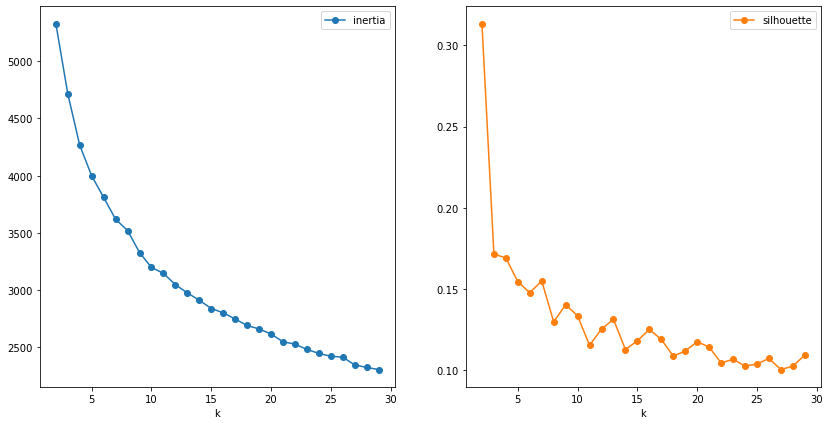

In [38]:
scores_df.plot(x='k', subplots=True, layout=(1,2), figsize=(14,7), marker='o');